In [1]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 4.3MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78935 sha256=1fbda680ab36c75fb7f1b5ce58c58dd583d53c179b8a4f62a2e930fe15822332
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=d405900e51f027ae3fc7239c6158578b032ef7b0fd6b2b663e8c77ce88084991
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# load the dat set fromkeras this is inbuilt data set

In [3]:
fashion_mnist=keras.datasets.fashion_mnist

# Traing and Test images

In [4]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# Scaling the images

In [5]:
train_images=train_images/255.0
test_images=test_images/255.0

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

# image Reshaping

In [8]:
train_images[15].shape # 15 is 15 th image out of 6000 images

(28, 28)

In [9]:
train_images=train_images.reshape(len(train_images),28,28,1)

In [10]:
train_images[0].shape

(28, 28, 1)

In [11]:
test_images=test_images.reshape(len(test_images),28,28,1)

In [12]:
test_images[0].shape

(28, 28, 1)

## Build model

In [13]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [14]:
from kerastuner import RandomSearch as  rs

In [15]:
from kerastuner.engine.hyperparameters import HyperParameters

In [16]:
tuner_search=rs(build_model,objective='val_accuracy',max_trials=5,directory='output',project_name='mnist_fashion')

In [17]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 25s]
val_accuracy: 0.9010000228881836

Best val_accuracy So Far: 0.906333327293396
Total elapsed time: 00h 03m 45s
INFO:tensorflow:Oracle triggered exit


In [18]:
model=tuner_search.get_best_models(num_models=1)[0]

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 96)        2496      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 48)        115248    
_________________________________________________________________
flatten (Flatten)            (None, 19200)             0         
_________________________________________________________________
dense (Dense)                (None, 96)                1843296   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                970       
Total params: 1,962,010
Trainable params: 1,962,010
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(train_images,train_labels,epochs=15,validation_split=0.1,initial_epoch=3)

Epoch 4/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1866 - accuracy: 0.9309 - val_loss: 0.2470 - val_accuracy: 0.9118
Epoch 5/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1514 - accuracy: 0.9424 - val_loss: 0.2648 - val_accuracy: 0.9112
Epoch 6/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1223 - accuracy: 0.9540 - val_loss: 0.2950 - val_accuracy: 0.9150
Epoch 7/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0973 - accuracy: 0.9641 - val_loss: 0.3182 - val_accuracy: 0.9095
Epoch 8/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0816 - accuracy: 0.9696 - val_loss: 0.3867 - val_accuracy: 0.9057
Epoch 9/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0629 - accuracy: 0.9775 - val_loss: 0.3783 - val_accuracy: 0.9125
Epoch 10/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0551 - accuracy: 0.9794 - val_loss: 0.4198 - val_a

# TRain model

In [21]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.6739 - accuracy: 0.9022

Test accuracy: 0.9021999835968018


In [22]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [23]:
predictions = probability_model.predict(test_images)

In [24]:
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.2319693 ],
      dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [35]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


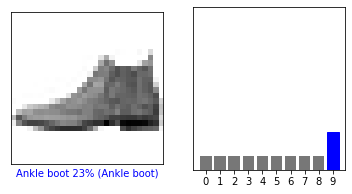

In [36]:
test_images=test_images.reshape(len(test_images),28,28)
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()